In [1]:
# Grab modules to load and plot data
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os

%matplotlib notebook

### Load data
- Find data file
- Read it in and parse first column as dates (when entry was created, not when SeapHOx sampled!)

In [2]:
cwd = os.getcwd()
file_path = os.path.join(cwd, 'Data', 'feed 20180419-1133.csv')
phox_df = pd.read_csv(file_path, sep = ',', parse_dates = [0])
print("Top few rows of", file_path, "look like...")
phox_df.head()

Top few rows of /Users/pjb/Dropbox/Self-Calibrating SeapHOx/Analysis/Data/feed 20180419-1133.csv look like...


,created_at,entry_id,field1
0,2018-04-16 14:13:35,651,"1900/01/04,16:00:00,17.330,0.06460,-0.84761,-0..."
1,2018-04-16 14:44:02,652,"1900/01/04,16:30:00,17.330,0.06447,-0.84772,-0..."
2,2018-04-16 15:14:31,653,"1900/01/04,17:00:00,17.330,0.06441,-0.84775,-0..."
3,2018-04-16 15:45:59,654,"1900/01/04,17:30:00,17.330,0.06432,-0.84781,-0..."
4,2018-04-16 16:16:24,655,"1900/01/04,18:00:00,17.330,0.06420,-0.84791,-0..."


### Extract useful data
- `field1` appears to have all of the SeapHOx strings
- `created_at` and `entry_id` may come in handy later but aren't as interesting scientifically

In [3]:
data_col = phox_df.field1
data_array = pd.DataFrame(data_col.str.split(',', expand = True)) 
data_array.columns = ['Date', 'Time', 'V_batt', 'V_int', 'V_ext', 'P_dbar', 'pH_int', 'O2_umolkg', 'temp_SBE', 'sal_SBE', 'V_batt_elec', 'charge_status']
data_array.set_index(pd.to_datetime(data_array['Date'] + ' ' + data_array['Time']), inplace = True)
data_array.drop(['Date', 'Time'], axis = 1, inplace = True)
data_array.head()

,V_batt,V_int,V_ext,P_dbar,pH_int,O2_umolkg,temp_SBE,sal_SBE,V_batt_elec,charge_status
1900-01-04 16:00:00,17.330,0.06460,-0.84761,-0.54700,7.74145,166.22501,22.02620,0.01080,3.76,40.46
1900-01-04 16:30:00,17.330,0.06447,-0.84772,-0.51300,7.73895,161.63800,22.12180,0.01080,3.76,40.46
1900-01-04 17:00:00,17.330,0.06441,-0.84775,-0.50800,7.73772,159.40401,22.18160,0.01080,3.76,40.11
1900-01-04 17:30:00,17.330,0.06432,-0.84781,-0.50900,7.73594,157.32899,22.17300,0.01080,3.76,39.75
1900-01-04 18:00:00,17.330,0.06420,-0.84791,-0.51400,7.73351,155.57800,22.23040,0.01090,3.76,39.75


### Filter
- Filter based on date
- Cast to type float (for some reason the str.split leaves it as arbitrary object)

In [4]:
date_filt = data_array.index > '2018-04-17 18:30:25'
data_filt = data_array[date_filt]
data_filt = data_filt.astype('float')

data_filt.head()
# data_filt.V_press

,V_batt,V_int,V_ext,P_dbar,pH_int,O2_umolkg,temp_SBE,sal_SBE,V_batt_elec,charge_status
2018-04-17 19:00:25,18.87,0.08055,-0.83331,5.416,8.08004,328.32300,13.4879,33.5614,4.05,84.62
2018-04-17 19:30:25,18.86,0.08002,-0.83326,5.388,8.07537,325.82300,13.5380,33.5589,4.05,84.62
2018-04-17 20:02:20,18.86,0.07946,-0.83334,5.354,8.06744,324.28900,13.5492,33.5621,4.05,84.48
2018-04-17 20:32:51,18.85,0.07959,-0.83293,5.219,8.06995,326.27499,13.6530,33.5635,4.05,84.48
2018-04-17 21:03:28,18.85,0.07947,-0.83281,5.144,8.06722,328.29700,13.7740,33.5598,4.05,84.48


<IPython.core.display.Javascript object>


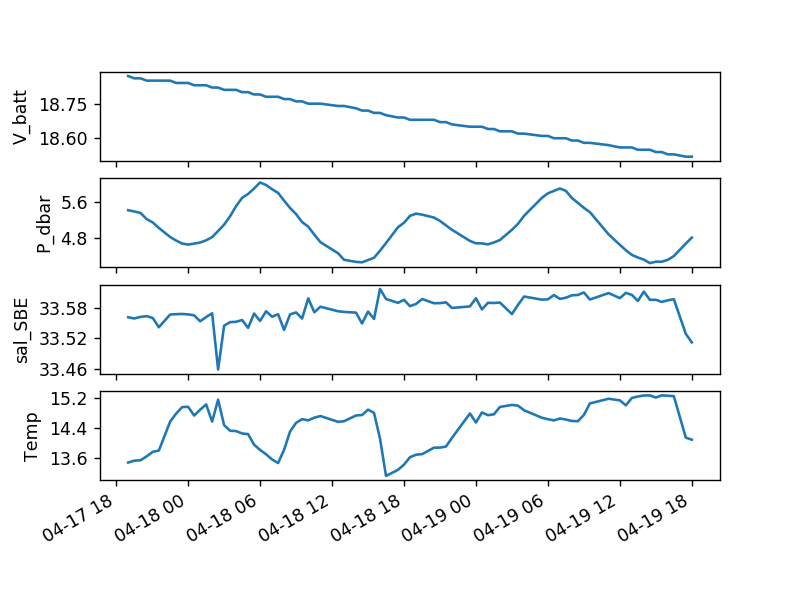

AxesSubplot(0.125,0.712609;0.775x0.167391)
AxesSubplot(0.125,0.511739;0.775x0.167391)
AxesSubplot(0.125,0.31087;0.775x0.167391)
AxesSubplot(0.125,0.11;0.775x0.167391)


In [9]:
fig, axs = plt.subplots(4, 1, sharex = True)
axs[0].plot(data_filt.index, data_filt.V_batt)
axs[0].set_ylabel('V_batt')

axs[1].plot(data_filt.index, data_filt.P_dbar)
axs[1].set_ylabel('P_dbar')

axs[2].plot(data_filt.index, data_filt.sal_SBE)
axs[2].set_ylabel('sal_SBE')

axs[3].plot(data_filt.index, data_filt.temp_SBE)
axs[3].set_ylabel('Temp')

axs[0].xaxis_date() # make sure it knows that x is a date/time

for axi in axs.flat:
#     axi.xaxis.set_major_locator(plt.MaxNLocator(3))
    print(axi)
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))
#     axi.yaxis.set_major_formatter(ticker.FormatStrFormatter("%.02f"))

fig.autofmt_xdate() # makes the date labels easier to read.